# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





In [63]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 1 # mean and variance of Z
a, b = 1, 1 #Coefficients used to compute X1 and X2
N = 1000 #number of samples of Z
K= 1000 # number of terms in the sum for X2
lambda0 = 1 # Parameter for X3
A0= 1 #Parameter for X3
phi0 = np.random.uniform(0, 2*np.pi,N) # Random variable used to compute X3
Z = [np.random.normal(mu, sigma, N) for _ in range(N)] #Original white noise
h = 0 # Value h used for the computation of Cov(X_t,X_t+h)

In [64]:
X1 = [a + b*Z[i] + Z[i-1] for i in range(1, N)]

X2 = []
for i in range(N):
    Sum = 0
    for j in range(K):
        if i-j>=0:
            Sum+=2**(-j)*Z[i-j]
    X2.append(Sum+a)

X3 = [A0*np.cos(lambda0*i+phi0[i])+Z[i] for i in range(N)]

mz = [np.mean(z) for z in Z]
mx1 = [np.mean(x) for x in X1]
mx2 = [np.mean(x) for x in X2]
mx3 = [np.mean(x) for x in X3]

print("mean(Z) =",mz)
print("mean(X1) =",mx1)
print("mean(X2) =",mx2)
print("mean(X3) =",mx3)

def mean_t(n):
    if (n == 0) or (n == 3):
        return 0
    elif (n == 1) or (n == 2):
        return a
    else:
        return 0

def autocov0(h):
    if h == 0:
        return sigma**2
    else:
        return 0

def autocov1(h):
    if (h == -1) or (h == 1):
        return b*sigma**2
    elif h == 0:
        return (b**2+1)*sigma**2
    else:
        return 0
    
def autocov2(h):
    return (2**(2-abs(h))*sigma**2)/3 

def autocov3(h):
    if h == 0:
        return A0**2/2+sigma**2
    else:
        return A0**2/2*np.cos(lambda0*h)

def autocov_t(n,h):
    if n == 0:
        return autocov0(h)
    elif n == 1:
        return autocov1(h)
    elif n == 2:
        return autocov1(h)
    elif n == 3:
        return autocov3(h)
    else:
        return 0

def covEmpi(X,h):
    su = np.zeros(N)
    n = len(X)
    mean = np.mean(X)
    for i in range(n):
        if (i+h<n) and (i+h>=0):
            su += (X[i+h]-mean)*(X[i]-mean)
    return su/(n-abs(h))
      
covE0 = covEmpi(Z,h)
covE1 = covEmpi(X1,h)
covE2 = covEmpi(X2,h)
covE3 = covEmpi(X3,h)

print("Cov(Z_t,Z_t+h) =",covE0)
print("Cov(X1_t,X1_t+h) =",covE1)
print("Cov(X2_t,X2_t+h) =",covE2)
print("Cov(X3_t,X3_t+h) =",covE3)

mean(Z) = [0.05205174885520529, 0.01774532256095546, 0.02954015766364581, 0.028326018414137854, 0.042199382591833305, -0.023277610799564436, 0.005774280453046844, -0.024286574936820307, -0.029584305625142814, 0.00426643076768022, -0.00927473168995031, 0.013181744372854758, -0.024947073237470276, -0.04589571028387713, 0.044540536578817916, 0.014638910757131742, 0.01486907770871979, 0.0033676682786848533, -0.04225947503419245, 0.05345345086807718, 0.03253660226858255, -0.00956126071800163, 0.019939316507686114, -0.02489362202599121, -0.011272061542092085, 0.018807620653780426, 0.0008277078394933408, -0.016015743138009245, -0.019754581896613273, -0.03170768665951617, -0.018641041596819372, 0.0051240850399180676, -0.03584816089437531, 0.04528286850187706, 0.0032120160474789082, 0.02580416432409586, -0.04320057761182859, -0.004229479220689493, 0.006244064812420888, 0.010959099921514146, 0.03384695543295244, -0.028862010560609063, -0.02189597687540401, 0.005778369741621377, 0.015778645208140

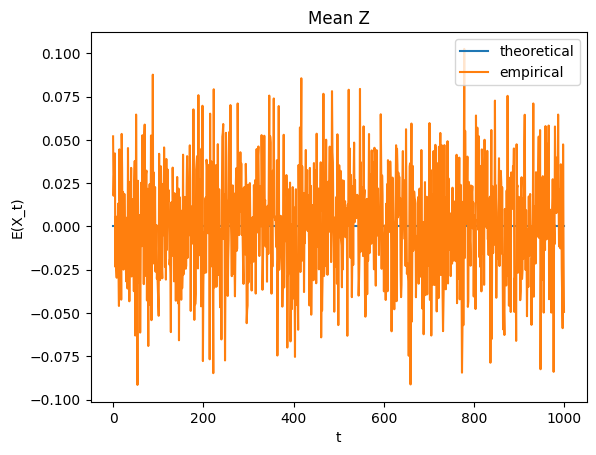

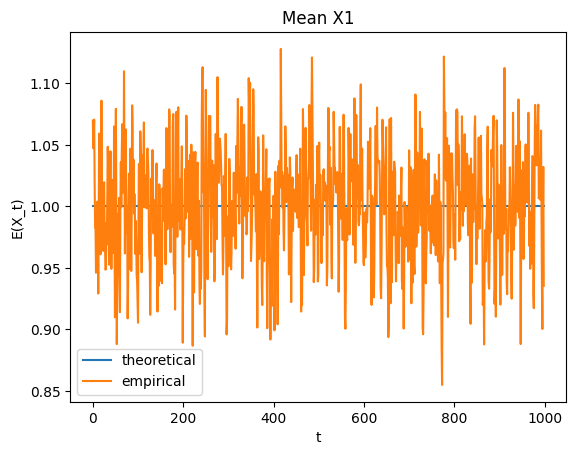

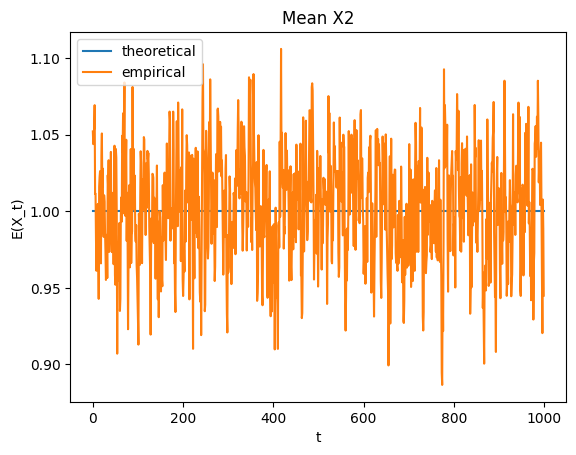

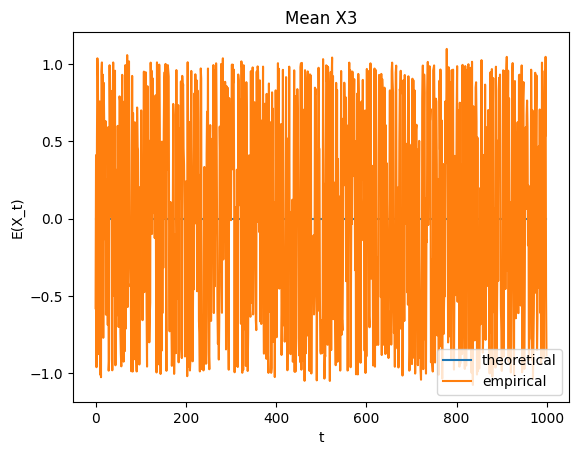

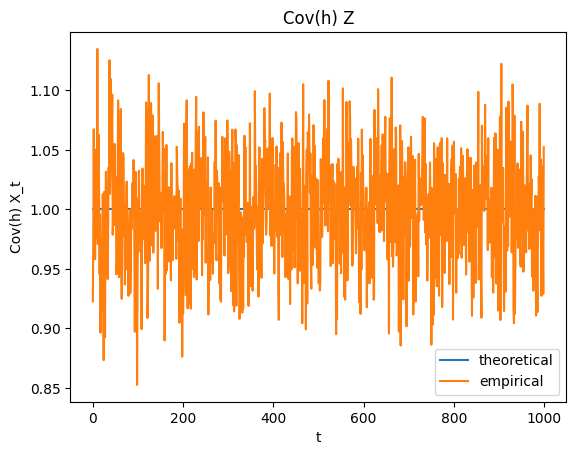

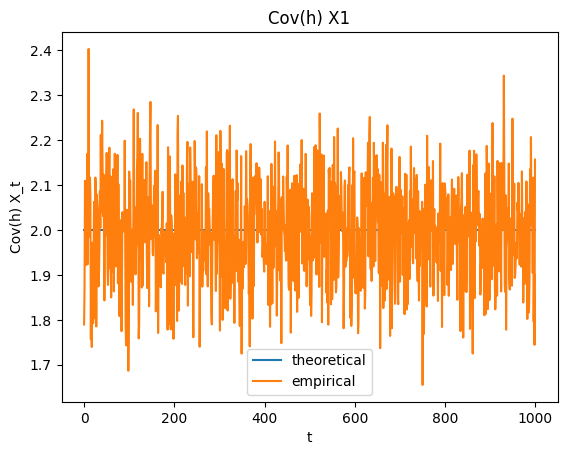

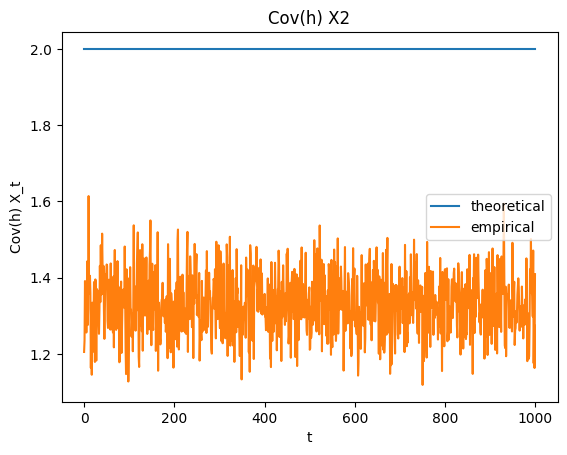

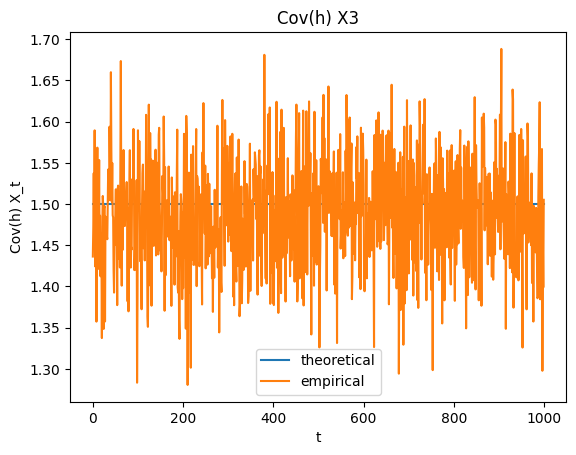

In [65]:
def plotmeanq3(X,k,title):
    x = range(len(X))
    y_t = [mean_t(k) for _ in x]
    y = [np.mean(i) for i in X]
    plt.clf()
    plt.plot(x,y_t)
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel("t")
    plt.ylabel("E(X_t)")
    plt.legend(["theoretical","empirical"])
    plt.show()

plotmeanq3(Z,0,"Mean Z")
plotmeanq3(X1,1,"Mean X1")
plotmeanq3(X2,2,"Mean X2")
plotmeanq3(X3,3,"Mean X3")

def plotcovq3(X,k,h,title):
    x = range(N)
    y_t = [autocov_t(k,h) for _ in x]
    y = covEmpi(X,h)
    plt.clf()
    plt.plot(x,y_t)
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel("t")
    plt.ylabel("Cov(h) X_t")
    plt.legend(["theoretical","empirical"])
    plt.show()
    
plotcovq3(Z,0,h,"Cov(h) Z")
plotcovq3(X1,1,h,"Cov(h) X1")
plotcovq3(X2,2,h,"Cov(h) X2")
plotcovq3(X3,3,h,"Cov(h) X3")


Since we estimate the values of the mean and the covariance we use a finite number of samples which means that there will be fluctuations in the values of the estimations between two terms of a time series.\
However all those fluctuations are centered around the theoretical value we want to estimate. For most of our time series we obtain variations of 0.1 for a theoretical value of 0 or 1 for the mean or the covariance except for the fourth time series in which the cosine term seems to be extremely important int the computation: Its mean which is supposed to be 0 fluctuates between 1 and -1 and its variance, theoreticaly 1.5, varies between 1.7 and 1.3 namely 13% relative error

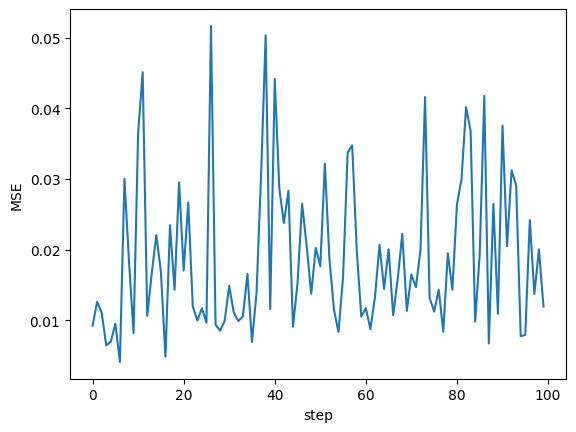

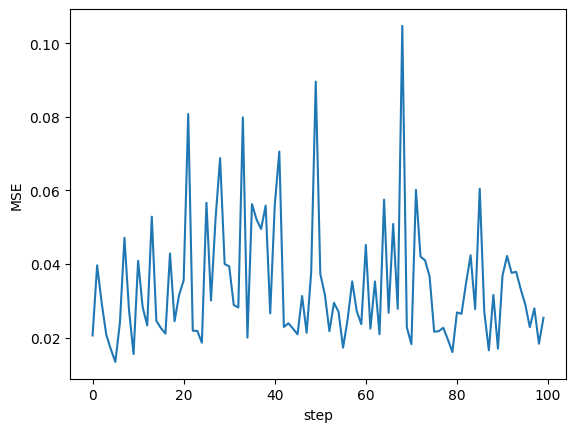

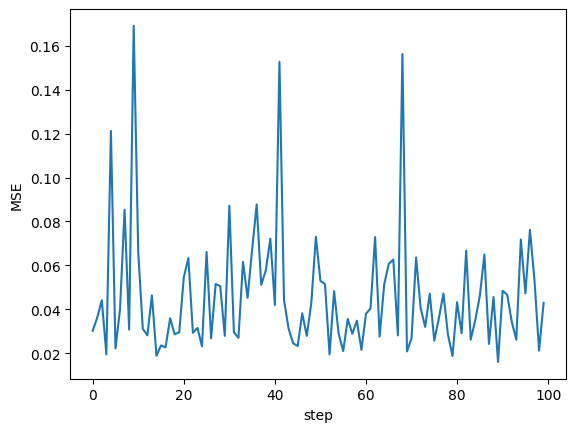

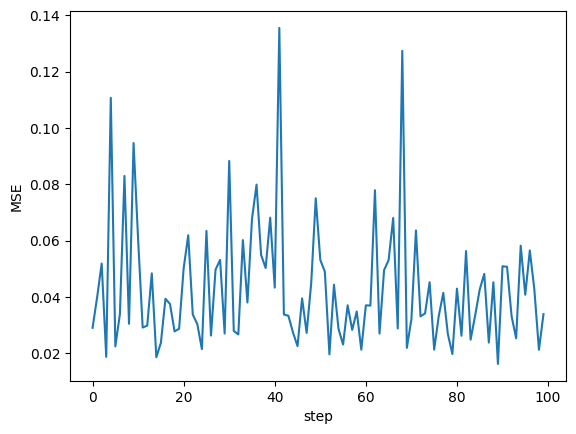

In [79]:
def plotq4(T,X,n):
    x = range(100)
    y=[]
    for i in x:
        s=0
        for j in np.linspace(0,N,T,endpoint = False,dtype='int'):
            s += (autocov_t(n,j)-covEmpi(X,j)[i])**2
        y.append(s/T)
    plt.clf()
    plt.plot(x,y)
    plt.xlabel("step")
    plt.ylabel("MSE")
    plt.show()

plotq4(10,X1,1)
plotq4(100,X1,1)
plotq4(500,X1,1)
plotq4(999,X1,1)# We can't take T = 1000 for X1 since it only has 999 samples

As we compute the MSE with more and more terms, the curve becomes more restrained in a value band, except for some spikes that appear here and there. Those spikes are more prevalent in the frist graphs because using less terms to estimate the covariance leads to less precision in this estimation.\
Appart from those spikes that can reach values of relative errors of 17%, most errors lie under the 5% mark, our estimation of the autocovariance function seems reliable anc can be used in cases which do not require extreme precision, ie relative errors of less than 1% or less for example.